<a href="https://colab.research.google.com/github/psrana/Machine-Learning-using-PyCaret/blob/main/02_PyCaret_for_Classification_with_Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **PyCaret for Classification**
---
- It is a bundle of many Machine Learning algorithms.
- Only three lines of code is required to compare 20 ML models.
- Pycaret is available for:
    - Classification
    - Regression
    - Clustering

---

### **Self learning resource**
1. Tutorial on Pycaret **<a href="https://pycaret.readthedocs.io/en/latest/tutorials.html"> Click Here</a>** 

2. Documentation on Pycaret-Classification: **<a href="https://pycaret.org/Classification/"> Click Here </a>**

---

### **In this tutorial we will learn:**

- Getting Data: How to import data from PyCaret repository
- Setting up Environment: How to setup an experiment in PyCaret and get started with building regression models
- Create Model: How to create a model, perform cross validation and evaluate regression metrics
- Tune Model: How to automatically tune the hyperparameters of a regression model
- Plot Model: How to analyze model performance using various plots
- Finalize Model: How to finalize the best model at the end of the experiment
- Predict Model: How to make prediction on new / unseen data
- Save / Load Model: How to save / load a model for future use

---



### **(a) Install Pycaret**

In [ ]:
!pip install pycaret &> /dev/null
print ("Pycaret installed sucessfully!!")

Pycaret installed sucessfully!!


### **(b) Get the version of the pycaret**

In [ ]:
from pycaret.utils import version
version()

'2.3.1'

---
# **1. Classification: Basics**
---
### **1.1 Get the list of datasets available in pycaret (55)**




In [ ]:
from pycaret.datasets import get_data
dataSets = get_data('index')

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,None,None,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,None,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,None,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,None,683,10,N
6,credit,Multivariate,Classification (Binary),default,None,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,None,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,None,10000,14,N
9,employee,Multivariate,Classification (Binary),left,None,14999,10,N


---
### **1.2 Get the "diabetes" dataset**
---

In [ ]:
diabetesDataSet = get_data("diabetes")    # SN is 7
# This is binary classification dataset. 
# The values in "Class variable" have two (binary) values.

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


---
### **1.3 "Parameter setting"  for all classification models**
##### **Train/Test division, applying data pre-processing** {Sampling, Normalization, Transformation, PCA, Handaling of Outliers, Feature Selection}
---

In [ ]:
from pycaret.classification import *
s = setup(data=diabetesDataSet, target='Class variable', train_size=0.7, silent=True)

,Description,Value
0,session_id,7820
1,Target,Class variable
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(768, 9)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


---
### **1.4 "Run and Compare" the model performance**
---

In [ ]:
cm = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.7709,0.0000,0.5474,0.7154,0.6167,0.4585,0.4687,0.017
lr,Logistic Regression,0.7689,0.8104,0.5637,0.7003,0.6218,0.4591,0.4663,0.506
lda,Linear Discriminant Analysis,0.7653,0.8001,0.5471,0.6957,0.6084,0.4461,0.4543,0.018
gbc,Gradient Boosting Classifier,0.7449,0.8021,0.5857,0.6391,0.6078,0.4200,0.4233,0.129
rf,Random Forest Classifier,0.7375,0.8042,0.5047,0.6509,0.5647,0.3823,0.3904,0.514
lightgbm,Light Gradient Boosting Machine,0.7374,0.7829,0.5249,0.6360,0.5694,0.3851,0.3917,0.094
et,Extra Trees Classifier,0.7244,0.7802,0.4661,0.6271,0.5287,0.3431,0.3524,0.465
ada,Ada Boost Classifier,0.7151,0.7768,0.5368,0.5924,0.5621,0.3520,0.3537,0.111
knn,K Neighbors Classifier,0.7115,0.7223,0.4880,0.5926,0.5327,0.3279,0.3321,0.120
dt,Decision Tree Classifier,0.6871,0.6563,0.5588,0.5493,0.5510,0.3119,0.3138,0.016


---
### **1.5 "Three line of code" for model comparison for "Cancer" dataset**
---



In [ ]:
from pycaret.datasets import get_data
from pycaret.classification import *

cancerDataSet = get_data("cancer")
s = setup(data = cancerDataSet, target='Class', silent=True)
cm = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9602,0.9901,0.9492,0.9375,0.9410,0.9111,0.9137,0.465
lr,Logistic Regression,0.9582,0.9890,0.9433,0.9363,0.9379,0.9064,0.9086,0.025
nb,Naive Bayes,0.9582,0.9763,0.9496,0.9333,0.9381,0.9066,0.9103,0.019
rf,Random Forest Classifier,0.9561,0.9893,0.9429,0.9315,0.9345,0.9016,0.9045,0.484
ridge,Ridge Classifier,0.9519,0.0000,0.9246,0.9379,0.9278,0.8919,0.8956,0.016
svm,SVM - Linear Kernel,0.9499,0.0000,0.9183,0.9341,0.9244,0.8869,0.8890,0.022
ada,Ada Boost Classifier,0.9498,0.9805,0.9308,0.9255,0.9247,0.8872,0.8908,0.118
lda,Linear Discriminant Analysis,0.9456,0.9842,0.8996,0.9426,0.9168,0.8766,0.8810,0.026
lightgbm,Light Gradient Boosting Machine,0.9455,0.9898,0.9242,0.9182,0.9180,0.8773,0.8808,0.047
gbc,Gradient Boosting Classifier,0.9414,0.9864,0.9179,0.9146,0.9132,0.8691,0.8725,0.128


---
### **1.6 "Three line of code" for model comparison for "Heart Disease" dataset**
---



In [ ]:
from pycaret.datasets import get_data
from pycaret.classification import *

heartDiseaseDataSet = get_data("heart_disease")
s = setup(data = heartDiseaseDataSet, target='Disease', silent=True)
cm = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8664,0.9004,0.8153,0.8939,0.8474,0.7291,0.7383,0.185
ridge,Ridge Classifier,0.8287,0.0000,0.8028,0.8354,0.8104,0.6540,0.6647,0.013
lda,Linear Discriminant Analysis,0.8287,0.8914,0.8028,0.8354,0.8104,0.6540,0.6647,0.017
nb,Naive Bayes,0.8240,0.8715,0.8139,0.8345,0.8072,0.6450,0.6662,0.017
et,Extra Trees Classifier,0.8026,0.8853,0.7347,0.8313,0.7726,0.5991,0.6104,0.466
lightgbm,Light Gradient Boosting Machine,0.7813,0.8801,0.7361,0.8013,0.7517,0.5581,0.5746,0.029
rf,Random Forest Classifier,0.7810,0.8815,0.7125,0.8080,0.7369,0.5546,0.5766,0.468
ada,Ada Boost Classifier,0.7749,0.8629,0.7236,0.8085,0.7467,0.5458,0.5668,0.099
gbc,Gradient Boosting Classifier,0.7491,0.8490,0.7250,0.7398,0.7215,0.4946,0.5059,0.083
dt,Decision Tree Classifier,0.6904,0.6876,0.6653,0.6731,0.6614,0.3755,0.3833,0.016


---
# **2. Classification: working with user dataset**
---
#### **2.1 Uploading "user file" from user system**

In [ ]:
from google.colab import files
#files.upload()                     # Uncomment this line

#### **2.2 "Read" the uploaded file**

In [ ]:
import pandas as pd
#myDataSet = pd.read_csv('Sample5 - Brest Cancer.csv')        # Uncomment this line and replace the file name that read in above step
#myDataSet.head()                                                # Uncomment this line

#### **2.3 "Compare" the model performance**

In [ ]:
from pycaret.classification import *

#s = setup(data = myDataSet, target='Cancer', silent=True)               # Uncomment this line
#cm = compare_models()                                                 # Uncomment this line

#### **2.4 "Three line of code" for model comparison for "user dataset**

##### Use it, while working on **"Anaconda/Jupyter notebook"** on local machine

In [ ]:
from pycaret.classification import *
import pandas as pd

#myDataSet = pd.read_csv("myData.csv")                          # Uncomment this line
#s = setup(data = myDataSet, target='cancer', silent=True)      # Uncomment this line
#cm = compare_models()                                          # Uncomment this line

---
# **3. Classification: Apply "Data Preprocessing"**
---

### **3.1 Model performance using "Normalization"**

In [ ]:
s = setup(data=diabetesDataSet, target='Class variable', normalize = True, normalize_method = 'zscore', silent=True)
cm = compare_models()

#normalize_method = {zscore, minmax, maxabs, robust}

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7505,0.8083,0.5079,0.6854,0.5807,0.4097,0.4202,0.026
ada,Ada Boost Classifier,0.7432,0.7917,0.5725,0.6559,0.6061,0.4173,0.4235,0.111
rf,Random Forest Classifier,0.7414,0.8066,0.5246,0.6690,0.5807,0.3990,0.4100,0.516
gbc,Gradient Boosting Classifier,0.7413,0.8184,0.5617,0.6561,0.5975,0.4099,0.4181,0.128
knn,K Neighbors Classifier,0.7395,0.7686,0.5184,0.6516,0.5705,0.3898,0.3984,0.115
lda,Linear Discriminant Analysis,0.7393,0.7994,0.4971,0.6648,0.5660,0.3858,0.3957,0.017
ridge,Ridge Classifier,0.7392,0.0000,0.4860,0.6686,0.5603,0.3820,0.3932,0.016
et,Extra Trees Classifier,0.7320,0.7918,0.5023,0.6426,0.5600,0.3729,0.3806,0.464
svm,SVM - Linear Kernel,0.7188,0.0000,0.5813,0.6068,0.5725,0.3697,0.3851,0.016
lightgbm,Light Gradient Boosting Machine,0.7060,0.7847,0.5301,0.5870,0.5492,0.3348,0.3403,0.051


### **3.2 Model performance using "Feature Selection"**

In [ ]:
s = setup(data=diabetesDataSet, target='Class variable', feature_selection = True, feature_selection_threshold = 0.9, silent=True)
cm = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7412,0.8128,0.6155,0.6624,0.6349,0.4359,0.4389,0.130
rf,Random Forest Classifier,0.7373,0.8029,0.5895,0.6649,0.6201,0.4220,0.4269,0.507
lr,Logistic Regression,0.7357,0.7965,0.5589,0.6732,0.6070,0.4110,0.4178,0.247
ridge,Ridge Classifier,0.7302,0.0000,0.5282,0.6740,0.5899,0.3931,0.4013,0.015
ada,Ada Boost Classifier,0.7298,0.7995,0.5674,0.6578,0.6029,0.4012,0.4076,0.113
lda,Linear Discriminant Analysis,0.7264,0.7871,0.5279,0.6617,0.5844,0.3849,0.3920,0.018
knn,K Neighbors Classifier,0.7207,0.7488,0.5847,0.6388,0.6042,0.3908,0.3962,0.119
lightgbm,Light Gradient Boosting Machine,0.7150,0.7766,0.6095,0.6215,0.6109,0.3872,0.3908,0.050
et,Extra Trees Classifier,0.7115,0.7792,0.5134,0.6456,0.5678,0.3555,0.3639,0.464
dt,Decision Tree Classifier,0.7039,0.6826,0.6005,0.6039,0.5980,0.3650,0.3684,0.017


### **3.3 Model performance using "Outlier Removal"**

In [ ]:
s = setup(data=diabetesDataSet, target='Class variable', remove_outliers = True, outliers_threshold = 0.05, silent=True)
cm = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7588,0.8401,0.5611,0.7101,0.6194,0.4477,0.4590,0.245
ridge,Ridge Classifier,0.7569,0.0000,0.5500,0.7108,0.6136,0.4413,0.4533,0.015
rf,Random Forest Classifier,0.7569,0.8201,0.5833,0.6825,0.6245,0.4479,0.4533,0.518
lda,Linear Discriminant Analysis,0.7549,0.8352,0.5556,0.7012,0.6136,0.4387,0.4491,0.017
et,Extra Trees Classifier,0.7431,0.7961,0.5667,0.6618,0.6071,0.4187,0.4240,0.468
gbc,Gradient Boosting Classifier,0.7412,0.8158,0.5889,0.6541,0.6158,0.4221,0.4264,0.124
ada,Ada Boost Classifier,0.7333,0.7972,0.5778,0.6422,0.6036,0.4043,0.4092,0.111
nb,Naive Bayes,0.7275,0.7689,0.4833,0.6450,0.5458,0.3616,0.3706,0.016
lightgbm,Light Gradient Boosting Machine,0.7255,0.7897,0.5722,0.6240,0.5945,0.3882,0.3909,0.047
knn,K Neighbors Classifier,0.7118,0.7482,0.5611,0.6020,0.5763,0.3595,0.3632,0.119


---
### **3.4 Model performance using "Transformation"**
---

In [ ]:
s = setup(data=diabetesDataSet, target='Class variable', transformation = True, transformation_method = 'yeo-johnson', silent=True)
cm = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7581,0.8012,0.5624,0.7198,0.6274,0.4523,0.4630,0.469
lr,Logistic Regression,0.7542,0.8229,0.5774,0.7138,0.6270,0.4483,0.4618,0.028
knn,K Neighbors Classifier,0.7487,0.7452,0.5466,0.7049,0.6075,0.4289,0.4415,0.119
lda,Linear Discriminant Analysis,0.7487,0.8232,0.5724,0.6936,0.6177,0.4352,0.4457,0.018
rf,Random Forest Classifier,0.7451,0.8130,0.5782,0.6804,0.6198,0.4310,0.4379,0.516
ridge,Ridge Classifier,0.7449,0.0000,0.5566,0.6925,0.6086,0.4245,0.4355,0.015
ada,Ada Boost Classifier,0.7373,0.7913,0.5871,0.6573,0.6118,0.4164,0.4225,0.111
gbc,Gradient Boosting Classifier,0.7281,0.8066,0.5408,0.6665,0.5880,0.3894,0.4006,0.123
lightgbm,Light Gradient Boosting Machine,0.7115,0.7868,0.5674,0.6147,0.5850,0.3656,0.3700,0.048
svm,SVM - Linear Kernel,0.6964,0.0000,0.5613,0.5954,0.5699,0.3370,0.3434,0.016


---
### **3.5 Model performance using "PCA"**
---

In [ ]:
s = setup(data=diabetesDataSet, target='Class variable', pca = True, pca_method = 'linear', silent=True)
cm = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7580,0.8045,0.6211,0.6702,0.6420,0.4602,0.4630,0.054
ada,Ada Boost Classifier,0.7560,0.7809,0.6105,0.6727,0.6361,0.4543,0.4585,0.109
rf,Random Forest Classifier,0.7542,0.8029,0.5895,0.6720,0.6261,0.4449,0.4482,0.514
lr,Logistic Regression,0.7374,0.7974,0.4842,0.7015,0.5652,0.3864,0.4050,0.023
ridge,Ridge Classifier,0.7355,0.0000,0.4789,0.6988,0.5596,0.3808,0.3999,0.013
lda,Linear Discriminant Analysis,0.7355,0.7989,0.4789,0.6988,0.5596,0.3808,0.3999,0.016
qda,Quadratic Discriminant Analysis,0.7335,0.7807,0.5053,0.6647,0.5686,0.3825,0.3935,0.016
et,Extra Trees Classifier,0.7335,0.7837,0.5421,0.6504,0.5888,0.3947,0.3998,0.468
gbc,Gradient Boosting Classifier,0.7261,0.7890,0.5579,0.6252,0.5885,0.3847,0.3868,0.122
nb,Naive Bayes,0.7224,0.7769,0.4947,0.6494,0.5588,0.3614,0.3706,0.015


---
### **3.6 Model performance using "Outlier Removal" + "Normalization"**
---

In [ ]:
s = setup(data=diabetesDataSet, target='Class variable', remove_outliers = True, outliers_threshold = 0.05, normalize = True, normalize_method = 'zscore', silent=True)
cm = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7784,0.8102,0.5100,0.7017,0.5854,0.4399,0.4536,0.025
ridge,Ridge Classifier,0.7686,0.0000,0.4854,0.6945,0.5615,0.4122,0.4303,0.014
gbc,Gradient Boosting Classifier,0.7686,0.8133,0.5475,0.6508,0.5908,0.4319,0.4374,0.123
lda,Linear Discriminant Analysis,0.7647,0.8095,0.4917,0.6731,0.5603,0.4063,0.4203,0.017
rf,Random Forest Classifier,0.7569,0.7982,0.4787,0.6446,0.5466,0.3862,0.3957,0.520
ada,Ada Boost Classifier,0.7490,0.7925,0.5033,0.6168,0.5458,0.3774,0.3856,0.111
lightgbm,Light Gradient Boosting Machine,0.7471,0.7997,0.5171,0.6094,0.5567,0.3821,0.3865,0.050
et,Extra Trees Classifier,0.7451,0.7860,0.4346,0.6155,0.5036,0.3430,0.3539,0.464
knn,K Neighbors Classifier,0.7275,0.7280,0.4412,0.5803,0.4930,0.3145,0.3242,0.118
nb,Naive Bayes,0.7196,0.7421,0.4929,0.5614,0.5186,0.3234,0.3289,0.017


---
### **3.7 Model performance using "Outlier Removal" +  "Normalization" + "Transformation"**
---

In [ ]:
s = setup(data=diabetesDataSet, target='Class variable', remove_outliers = True, outliers_threshold = 0.05, normalize = True, normalize_method = 'zscore', transformation = True, transformation_method = 'yeo-johnson', silent=True)
cm = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7686,0.8312,0.5487,0.6958,0.6019,0.4481,0.4590,0.025
gbc,Gradient Boosting Classifier,0.7686,0.8226,0.5536,0.7141,0.6190,0.4566,0.4676,0.122
ridge,Ridge Classifier,0.7627,0.0000,0.5310,0.6935,0.5885,0.4323,0.4449,0.016
ada,Ada Boost Classifier,0.7627,0.8032,0.5654,0.6928,0.6134,0.4465,0.4571,0.111
lda,Linear Discriminant Analysis,0.7608,0.8256,0.5366,0.6854,0.5898,0.4303,0.4416,0.017
rf,Random Forest Classifier,0.7569,0.8076,0.5304,0.6755,0.5864,0.4212,0.4309,0.515
knn,K Neighbors Classifier,0.7549,0.7803,0.5193,0.6773,0.5834,0.4164,0.4257,0.117
et,Extra Trees Classifier,0.7412,0.7914,0.4725,0.6631,0.5474,0.3756,0.3879,0.467
lightgbm,Light Gradient Boosting Machine,0.7275,0.8032,0.5944,0.5950,0.5914,0.3879,0.3902,0.050
svm,SVM - Linear Kernel,0.7118,0.0000,0.5490,0.5878,0.5549,0.3459,0.3546,0.018


---
### **3.8 Explore more parameters of "setup()" on pycaret**
---
- Explore setup() paramaeters in **Step 1.4**
- **<a href="https://pycaret.org/classification/#setup"> Click Here</a>** for more

---
# **4. Classification: More Operations**
---
### **4.1 Build a single model - "RandomForest"**

In [ ]:
from pycaret.datasets import get_data
from pycaret.classification import *

diabetesDataSet = get_data("diabetes")
s = setup(data=diabetesDataSet, target='Class variable', silent=True)

rfModel = create_model('rf')
# Explore more parameters

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8519,0.8955,0.7368,0.8235,0.7778,0.6672,0.6695
1,0.6667,0.7023,0.4211,0.5333,0.4706,0.2322,0.2357
2,0.7407,0.8744,0.5263,0.6667,0.5882,0.4028,0.4088
3,0.7407,0.7669,0.5789,0.6471,0.6111,0.4176,0.4190
4,0.7407,0.8135,0.4211,0.7273,0.5333,0.3710,0.3976
5,0.7222,0.8489,0.6842,0.5909,0.6341,0.4122,0.4151
6,0.7222,0.7872,0.5263,0.6250,0.5714,0.3682,0.3711
7,0.8491,0.9198,0.6111,0.9167,0.7333,0.6339,0.6592
8,0.7170,0.7944,0.4444,0.6154,0.5161,0.3234,0.3320
9,0.7925,0.7905,0.6111,0.7333,0.6667,0.5178,0.5223


---
### **4.2 Other available classification models**
---
-	'ada' -	Ada Boost Classifier
-	'dt' -	Decision Tree Classifier
-	'et' -	Extra Trees Classifier
-	'gbc' -	Gradient Boosting Classifier
-	'knn' -	K Neighbors Classifier
-	'lightgbm' -	Light Gradient Boosting Machine
-	'lda' -	Linear Discriminant Analysis
-	'lr' -	Logistic Regression
-	'nb' -	Naive Bayes
-	'qda' -	Quadratic Discriminant Analysis
-	'rf' -	Random Forest Classifier
-	'ridge' -	Ridge Classifier
-	'svm' -	SVM - Linear Kernel

---
### **4.3 Explore more parameters of "create_model()" on pycaret**
---

**<a href="https://pycaret.org/classification/#create-model"> Click Here</a>** 

---
### **4.4 Make prediction on the "new unseen dataset"**
---
#### **Get the "new unseen dataset"**



In [ ]:
# Select top 10 rows from diabetes dataset
newDataSet = get_data("diabetes").iloc[:10]

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### **Make prediction on "new unseen dataset"**

In [ ]:
newPredictions = predict_model(rfModel, data = newDataSet)
newPredictions

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable,Label,Score
0,6,148,72,35,0,33.6,0.627,50,1,1,0.90
1,1,85,66,29,0,26.6,0.351,31,0,0,0.92
2,8,183,64,0,0,23.3,0.672,32,1,1,0.90
3,1,89,66,23,94,28.1,0.167,21,0,0,1.00
4,0,137,40,35,168,43.1,2.288,33,1,1,0.60
5,5,116,74,0,0,25.6,0.201,30,0,0,0.90
6,3,78,50,32,88,31.0,0.248,26,1,1,0.78
7,10,115,0,0,0,35.3,0.134,29,0,0,0.88
8,2,197,70,45,543,30.5,0.158,53,1,1,0.72
9,8,125,96,0,0,0.0,0.232,54,1,1,0.64


---
### **4.5 "Save" the prediction results to csv** 
---

In [ ]:
newPredictions.to_csv("NewPredictions.csv")
print("Result saved in NewPredictions.csv")

Result saved in NewPredictions.csv


---
### **4.6 Download the "result file" to user local system** 
---

In [ ]:
from google.colab import files
#files.download('NewPredictions.csv')      # Uncomment this line

---
### **4.7 "Save" the trained model** 
---

In [ ]:
sm = save_model(rfModel, 'rfModelFile')

Transformation Pipeline and Model Succesfully Saved


---
### **4.8 Download the "trained model file" to user local system** 
---

In [ ]:
from google.colab import files
#files.download('rfModelFile.pkl')           # Uncomment this line

---
### **4.9  "Upload the trained model" --> "Load the model"  --> "Make the prediction" on "new unseen dataset"** 
---
#### **4.9.1 Upload the  "Trained Model"**


In [ ]:
from google.colab import files
#files.upload()                    # Uncomment this line

#### **4.9.2 Load the "Model"**

In [ ]:
#rfModel = load_model('rfModelFile (1)')        # Uncomment this line

#### **4.9.3 Make the prediction on "new unseen dataSet"**

In [ ]:
newPredictions = predict_model(rfModel, data = newDataSet)
newPredictions

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable,Label,Score
0,6,148,72,35,0,33.6,0.627,50,1,1,0.90
1,1,85,66,29,0,26.6,0.351,31,0,0,0.92
2,8,183,64,0,0,23.3,0.672,32,1,1,0.90
3,1,89,66,23,94,28.1,0.167,21,0,0,1.00
4,0,137,40,35,168,43.1,2.288,33,1,1,0.60
5,5,116,74,0,0,25.6,0.201,30,0,0,0.90
6,3,78,50,32,88,31.0,0.248,26,1,1,0.78
7,10,115,0,0,0,35.3,0.134,29,0,0,0.88
8,2,197,70,45,543,30.5,0.158,53,1,1,0.72
9,8,125,96,0,0,0.0,0.232,54,1,1,0.64


---
# **5. Plot the trained model**
---
**Following parameters can be plot for a trained model**
*   Area Under the Curve         - 'auc'
*   Discrimination Threshold     - 'threshold'
*   Precision Recall Curve       - 'pr'
*   Confusion Matrix             - 'confusion_matrix'
*   Class Prediction Error       - 'error'
*   Classification Report        - 'class_report'
*   Decision Boundary            - 'boundary'
*   Recursive Feat. Selection    - 'rfe'
*   Learning Curve               - 'learning'
*   Manifold Learning            - 'manifold'
*   Calibration Curve            - 'calibration'
*   Validation Curve             - 'vc'
*   Dimension Learning           - 'dimension'
*   Feature Importance           - 'feature'
*   Model Hyperparameter         - 'parameter'

---
### **5.1 Create RandomForest model or any other model**
---

In [ ]:
rfModel = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8519,0.8955,0.7368,0.8235,0.7778,0.6672,0.6695
1,0.6667,0.7023,0.4211,0.5333,0.4706,0.2322,0.2357
2,0.7407,0.8744,0.5263,0.6667,0.5882,0.4028,0.4088
3,0.7407,0.7669,0.5789,0.6471,0.6111,0.4176,0.4190
4,0.7407,0.8135,0.4211,0.7273,0.5333,0.3710,0.3976
5,0.7222,0.8489,0.6842,0.5909,0.6341,0.4122,0.4151
6,0.7222,0.7872,0.5263,0.6250,0.5714,0.3682,0.3711
7,0.8491,0.9198,0.6111,0.9167,0.7333,0.6339,0.6592
8,0.7170,0.7944,0.4444,0.6154,0.5161,0.3234,0.3320
9,0.7925,0.7905,0.6111,0.7333,0.6667,0.5178,0.5223


---
### **5.2 Create "Confusion Matrix"**
---

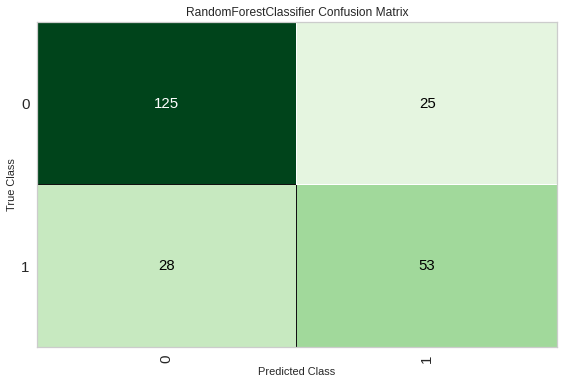

In [ ]:
plot_model(rfModel, plot='confusion_matrix')

---
### **5.3 Plot the "learning curve"**
---

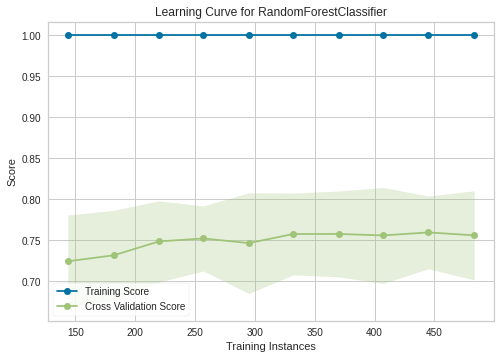

In [ ]:
plot_model(rfModel, plot='learning')

---
### **5.4 Plot the "AUC Curve" (Area Under the Curve)**
---

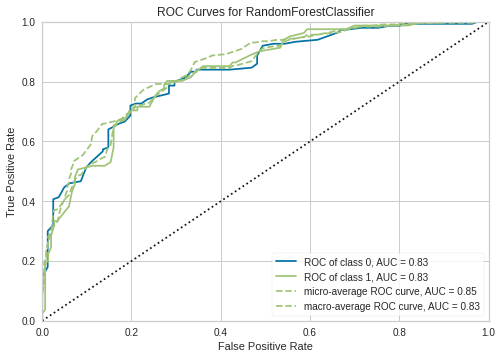

In [ ]:
plot_model(rfModel, plot='auc')

---
### **5.5 Plot the "Decision Boundary"**
---

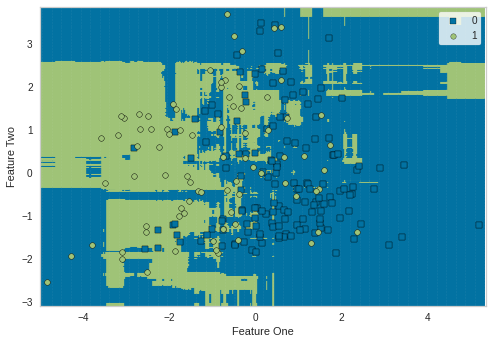

In [ ]:
plot_model(rfModel, plot='boundary')

---
### **5.6 Get the model "parameters"**
---

In [ ]:
plot_model(rfModel, plot='parameter')

,Parameters
bootstrap,True
ccp_alpha,0.0
class_weight,None
criterion,gini
max_depth,None
max_features,auto
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_impurity_split,None


---
### **5.7 Explore the more parameters of "plot_model()" on pycaret**
---
**<a href="https://pycaret.org/classification/#plot-model"> Click Here </a>**

---
# **6. Feature Importance**
---
#### **6.1 Feature Importance using "Random Forest"**


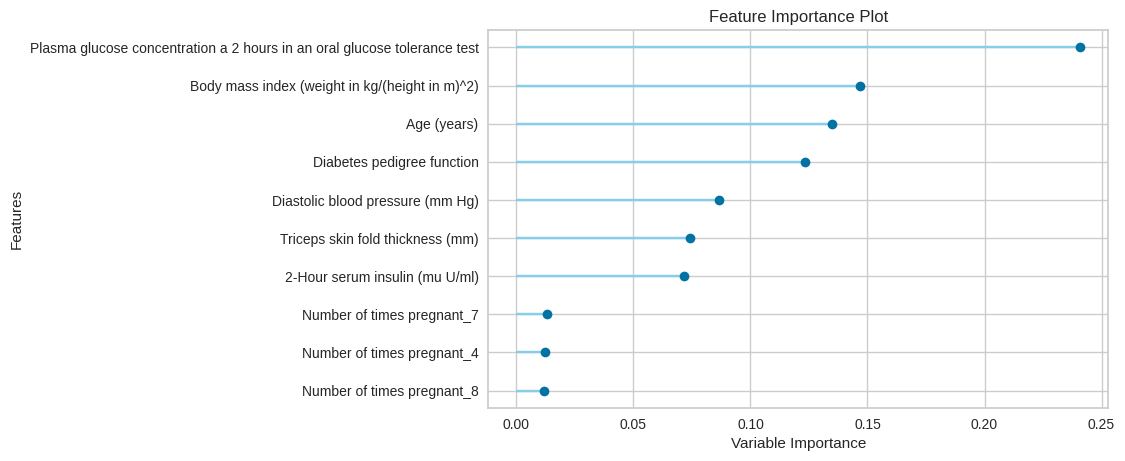

In [ ]:
rfModel = create_model('rf', verbose=False)
plot_model(rfModel, plot='feature')

---
### **6.2 Feature Importance using "Extra Trees Regressor"**
---

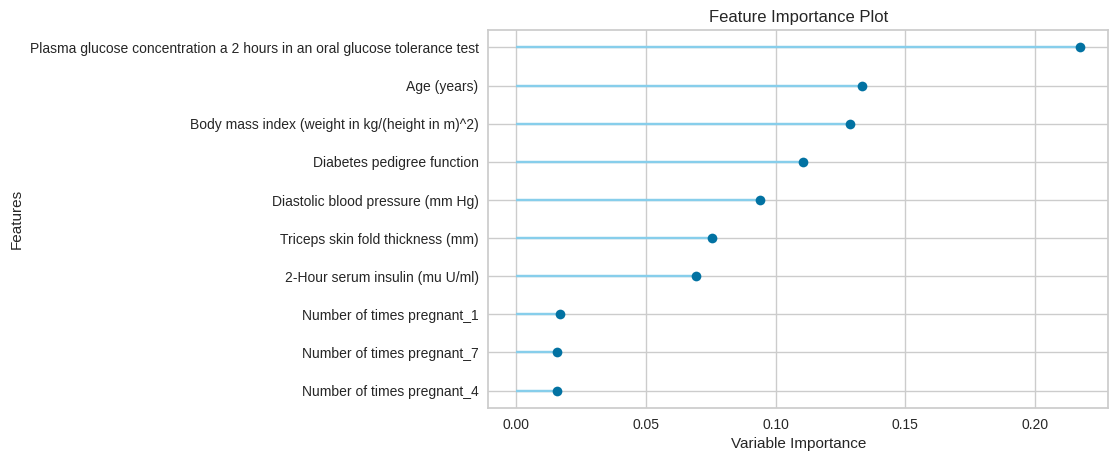

In [ ]:
etModel = create_model('et', verbose=False)
plot_model(etModel, plot='feature')

---
### **6.3 Feature Importance using "Decision Tree"**
---

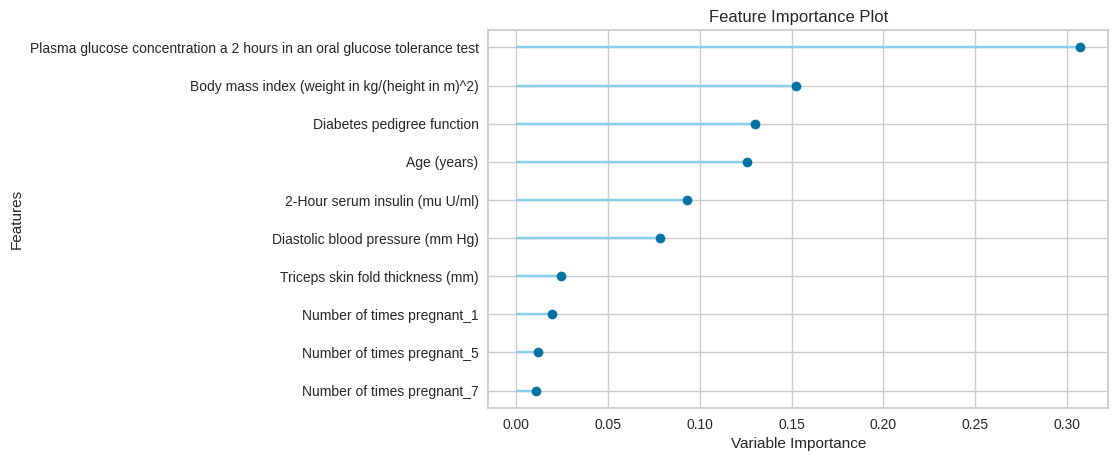

In [ ]:
dtModel = create_model('dt', verbose=False)
plot_model(dtModel, plot='feature')

---
# **7. Tune/Optimize the model performance**
---
### **7.1 Train "Decision Tree" with default parameters**


In [ ]:
dtModel = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8148,0.8090,0.7895,0.7143,0.7500,0.6035,0.6054
1,0.6296,0.6301,0.6316,0.4800,0.5455,0.2426,0.2492
2,0.6852,0.6489,0.5263,0.5556,0.5405,0.3014,0.3016
3,0.6481,0.6083,0.4737,0.5000,0.4865,0.2192,0.2194
4,0.6852,0.6248,0.4211,0.5714,0.4848,0.2656,0.2720
5,0.6852,0.6850,0.6842,0.5417,0.6047,0.3489,0.3555
6,0.5741,0.5511,0.4737,0.4091,0.4390,0.0987,0.0994
7,0.7358,0.6786,0.5000,0.6429,0.5625,0.3775,0.3836
8,0.6981,0.6770,0.6111,0.5500,0.5789,0.3447,0.3458
9,0.7358,0.7190,0.6667,0.6000,0.6316,0.4266,0.4280


#### **Get the "parameters" of Decision Tree**

In [ ]:
plot_model(dtModel, plot='parameter')

,Parameters
ccp_alpha,0.0
class_weight,None
criterion,gini
max_depth,None
max_features,None
max_leaf_nodes,None
min_impurity_decrease,0.0
min_impurity_split,None
min_samples_leaf,1
min_samples_split,2


---
### **7.2 Tune "Decision Tree" model**
---

In [ ]:
dtModelTuned = tune_model(dtModel, n_iter=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8333,0.8895,0.6316,0.8571,0.7273,0.6112,0.6260
1,0.6852,0.6519,0.3684,0.5833,0.4516,0.2463,0.2591
2,0.6852,0.8218,0.3684,0.5833,0.4516,0.2463,0.2591
3,0.6481,0.7150,0.6842,0.5000,0.5778,0.2885,0.2989
4,0.7593,0.7737,0.4211,0.8000,0.5517,0.4081,0.4474
5,0.7593,0.8669,0.4737,0.7500,0.5806,0.4236,0.4456
6,0.7222,0.7459,0.4211,0.6667,0.5161,0.3350,0.3524
7,0.8113,0.8492,0.7778,0.7000,0.7368,0.5904,0.5924
8,0.7736,0.7825,0.4444,0.8000,0.5714,0.4342,0.4688
9,0.6792,0.7190,0.3333,0.5455,0.4138,0.2103,0.2224


#### **Get the "tuned parameters" of Decision Tree**

In [ ]:
plot_model(dtModelTuned, plot='parameter')

,Parameters
ccp_alpha,0.0
class_weight,None
criterion,gini
max_depth,3
max_features,1.0
max_leaf_nodes,None
min_impurity_decrease,0.001
min_impurity_split,None
min_samples_leaf,2
min_samples_split,10


---
### **7.3 Explore more parameters of "tune_model()" on pycaret**
---
**<a href="https://pycaret.org/classification/#tune-model"> Click Here </a>**

---
# **8. Deploy the model on AWS**
---
**<a href="https://pycaret.org/classification#deploy-model">Click Here</a>**
